# Module 1 Get Started on GeoPandas

In [ ]:
# geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tertiary")
location = geolocator.geocode("Singapore")
print(location.latitude, location.longitude)

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

## Read from Dataset

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.head()

In [ ]:
# Plot GeoDataFrame

world.plot()

In [ ]:
cities= geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [ ]:
ax = world.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax,color='red')

## Read GeoJSON Data

In [ ]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
world = geopandas.read_file(url)

In [ ]:
world.plot()

## Read Shapefile Data

In [ ]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [ ]:
countries.head()

In [ ]:
countries.plot()

## Shapely

In [ ]:
from shapely.geometry import Point, Polygon, LineString

p = Point(1, 1)
print(p)

In [ ]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])
polygon

In [ ]:
polygon.area

## Creating GeoSeries from Shapely

In [ ]:
gs = geopandas.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

In [ ]:
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

## Creating GeoSeries from Geometry

In [ ]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [ ]:
geometry = [Point(x) for x in zip(data['lon'], data['lat'])]

In [ ]:
gs = geopandas.GeoSeries(geometry, index=data['name'])
gs

## GeoSeries Attributes

In [ ]:
type(countries.geometry)

In [ ]:
countries.geometry

In [ ]:
countries.geometry.area

## Creating GeoDataFrame from DataFrame

In [49]:
df = pd.DataFrame(data)

In [51]:
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

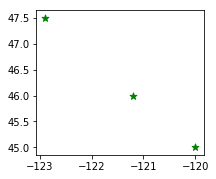

In [52]:
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3));

## Ex: Creating DataFrame

In [ ]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [53]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [66]:
geometry = [Point(x) for x in zip(df['Longitude'], df['Latitude'])]

In [67]:
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

In [62]:
print(gdf.head())

           City    Country  Latitude  Longitude               geometry  \
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-34.58 -58.66)   
1      Brasilia     Brazil    -15.78     -47.91  POINT (-15.78 -47.91)   
2      Santiago      Chile    -33.45     -70.66  POINT (-33.45 -70.66)   
3        Bogota   Colombia      4.60     -74.08     POINT (4.6 -74.08)   
4       Caracas  Venezuela     10.48     -66.86   POINT (10.48 -66.86)   

             Coordinates  
0  POINT (-58.66 -34.58)  
1  POINT (-47.91 -15.78)  
2  POINT (-70.66 -33.45)  
3     POINT (-74.08 4.6)  
4   POINT (-66.86 10.48)  


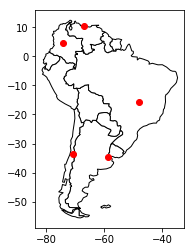

In [68]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf2.plot(ax=ax, color='red')

plt.show()

## Using GeoDataFrame

In [ ]:
type(countries)

In [ ]:
countries['pop_est'].mean()

In [ ]:
asia = countries[countries['continent'] == 'Asia']

In [ ]:
asia.plot()

## Coordinate Reference System 

In [ ]:
countries.crs

In [ ]:
countries.plot()

In [ ]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [ ]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

In [ ]:
countries_mercator.plot()

## Overlaying Multiple Map Layers

In [ ]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red')


## Ex: Overlaying Multiple Map Layerss


In [ ]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')

## Color Schmes

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd');

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

In [ ]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)